# Bài 1


Cho bài toán XOR
Implement thuật toán neural network để giải bài toán dùng Pytorch


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim


In [34]:
# Input data
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

# Labels
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)


In [35]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 2) 
        self.fc2 = nn.Linear(2, 1)  
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))  
        x = torch.sigmoid(self.fc2(x)) 
        return x


In [36]:
model = XORModel()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent optimizer


In [37]:
num_epochs = 10000  # Number of training epochs

for epoch in range(num_epochs):
    outputs = model(X)
    
    loss = criterion(outputs, Y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch  % 1000 == 0:
        print(f'Epoch {epoch }, Loss: {loss.item():.4f}')

print('Training complete!')


Epoch 0, Loss: 0.2572
Epoch 1000, Loss: 0.2500
Epoch 2000, Loss: 0.2499
Epoch 3000, Loss: 0.2499
Epoch 4000, Loss: 0.2498
Epoch 5000, Loss: 0.2496
Epoch 6000, Loss: 0.2491
Epoch 7000, Loss: 0.2472
Epoch 8000, Loss: 0.2381
Epoch 9000, Loss: 0.2111
Training complete!


In [6]:
with torch.no_grad():
    test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predictions = model(test_input)
    for i, pred in enumerate(predictions):
        print(f"Input: {test_input[i].tolist()}, Loss =  {pred.item():.4f}")


Input: [0.0, 0.0], Predicted Output: 0.1287
Input: [0.0, 1.0], Predicted Output: 0.8647
Input: [1.0, 0.0], Predicted Output: 0.8647
Input: [1.0, 1.0], Predicted Output: 0.1570


# Bài 2   

Cho dataset MNIST

Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch.

Chỉnh learning rate, vẽ đồ thị loss tương ứng.

Chia tập train/test tỉ lệ 80/20, tính các chỉ số accuracy, recall, f1-score trên tập test.

Epoch 1/10, Loss: 0.5012433598736922
Epoch 2/10, Loss: 0.19558051527043183
Epoch 3/10, Loss: 0.14137067233771086
Epoch 4/10, Loss: 0.11264895973851283
Epoch 5/10, Loss: 0.09121726246302327
Epoch 6/10, Loss: 0.07935844864882528
Epoch 7/10, Loss: 0.06925864955162009
Epoch 8/10, Loss: 0.06149179315318664
Epoch 9/10, Loss: 0.05267623559742545
Epoch 10/10, Loss: 0.0492690567599299


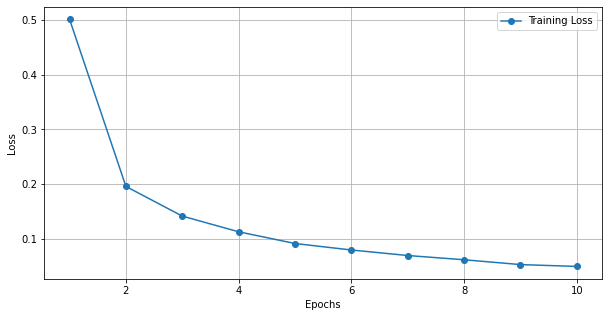

Accuracy: 0.9758
Recall: 0.9758
F1-Score: 0.9758


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import numpy as np

torch.manual_seed(42)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(trainset))
test_size = len(trainset) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(trainset, [train_size, test_size])

batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1 # Adjust the learning rate here
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())

accuracy = accuracy_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Bài 3

Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4

- Exponential function có giới cận dưới là 0. Điều này có nghĩa là kết quả của hàm softmax luôn là các số không âm. Trong bài toán phân loại, tính chất này đảm bảo rằng kết quả của hàm softmax có thể hiểu là xác suất.

- Exponential function giúp đạo hàm đẹp, dễ dàng hơn.Exponentional function có đạo hàm dương =>  có thể được sử dụng để tối ưu hóa các hàm bằng phương pháp gradient descent.

- Số e thường được sử dụng vì nó giúp tránh vấn đề số học như overflow và underflow trong quá trình tính toán.